# Predict Citizen Income Group

## Use 5 different classification models to compare which one have the best performance. (Logitsic Regression, LDA, KNN, Classification Tree, Random Forest)

## Data preprocessing

- Load the data and check data distribution.
- Because we are doing classification problem, we don't focus on normal distribution with predictors.
- We found the most of capital gain are small. Only few outliers above them, so does capital loss.
- The mode for hours per week is 40.

In [3]:
library(tidyverse)
adult<-read.table("adult.data", sep=",", stringsAsFactors = F, na.strings = "?")
colnames(adult)<-c("age","workclass","fnlwgt","eduaction","education_num","marital_status","occupation",
                   "relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income")
head(adult)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



,age,workclass,fnlwgt,eduaction,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


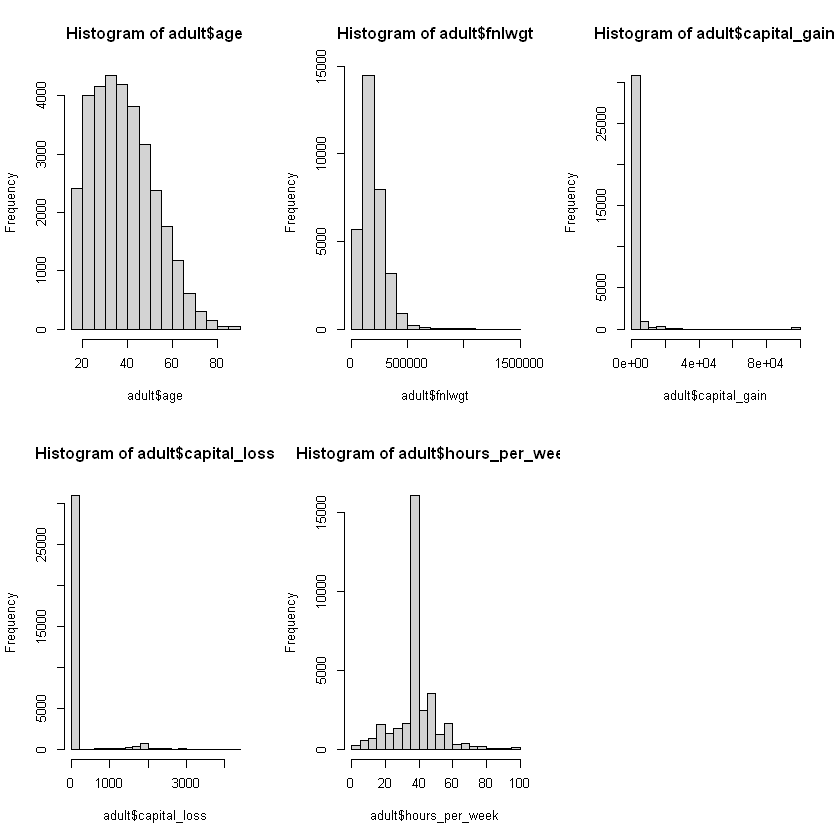

In [2]:
par(mfrow = c(2,3))
hist(adult$age)
hist(adult$fnlwgt)
hist(adult$capital_gain)
hist(adult$capital_loss)
hist(adult$hours_per_week)

- Check every observations having missing value or not. If there have missing value, we would remove the observation. (Because there only have 7% observations missing, we choose to omit them. However, if we have more missing value such as higher than 10% or 20% missing values, I would choose to use mean/ median/ mode to predict them or I can use KNN model to predict them.)

In [3]:
z = c()
for (i in 1:nrow(adult)){
  for (j in 1:15){
    if(adult[i,j]==" ?"){
      z = append(z,i)
      break
    }
  }
}

adult = adult[-z, ]

mutate(adult, income = recode(income," <=50K"="1",
                              " >50K"="0")) -> adult # because logistic regression predict 1/0, we transfer here.

adult$income <- as.numeric(adult$income)
head(adult)

,age,workclass,fnlwgt,eduaction,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1


## Fit logistic regression with variable selection

- Use Forward Stepwise to do variable selection.

In [4]:
full <- glm(income~.,data = adult,family = binomial(link=logit))
null <- glm(income~1,data = adult,family = binomial(link=logit))

step(null,scope = list(lower = null, upper = full), method = "forward")

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Start:  AIC=33852.71
income ~ 1



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                 Df Deviance   AIC
+ relationship    5    26902 26914
+ marital_status  6    27266 27280
+ eduaction      15    29946 29978
+ occupation     13    29954 29982
+ education_num   1    30109 30113
+ capital_gain    1    30699 30703
+ age             1    32112 32116
+ hours_per_week  1    32232 32236
+ sex             1    32287 32291
+ workclass       6    33136 33150
+ capital_loss    1    33269 33273
+ race            4    33504 33514
+ native_country 40    33461 33543
+ fnlwgt          1    33848 33852
<none>                 33851 33853

Step:  AIC=26914.23
income ~ relationship



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                 Df Deviance   AIC
+ eduaction      15    23485 23527
+ education_num   1    23576 23590
+ occupation     13    23961 23999
+ capital_gain    1    24433 24447
+ hours_per_week  1    26296 26310
+ capital_loss    1    26536 26550
+ workclass       6    26530 26554
+ age             1    26581 26595
+ native_country 40    26557 26649
+ marital_status  6    26761 26785
+ sex             1    26784 26798
+ race            4    26791 26811
<none>                 26902 26914
+ fnlwgt          1    26901 26915
- relationship    5    33851 33853

Step:  AIC=23526.95
income ~ relationship + eduaction



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


                 Df Deviance   AIC
+ capital_gain    1    21575 21619
+ occupation     13    22635 22703
+ hours_per_week  1    23117 23161
+ age             1    23128 23172
+ capital_loss    1    23252 23296
+ workclass       6    23270 23324
+ marital_status  6    23288 23342
+ sex             1    23339 23383
+ native_country 40    23354 23476
+ race            4    23442 23492
+ fnlwgt          1    23477 23521
<none>                 23485 23527
- eduaction      15    26902 26914
- relationship    5    29946 29978


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=21619.14
income ~ relationship + eduaction + capital_gain



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance   AIC
+ occupation     13    20825 20895
+ capital_loss    1    21221 21267
+ hours_per_week  1    21255 21301
+ age             1    21321 21367
+ workclass       6    21390 21446
+ marital_status  6    21398 21454
+ sex             1    21450 21496
+ native_country 40    21459 21583
+ race            4    21534 21586
+ fnlwgt          1    21569 21615
<none>                 21575 21619
- capital_gain    1    23485 23527
- eduaction      15    24434 24448
- relationship    5    27567 27601


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=20894.81
income ~ relationship + eduaction + capital_gain + occupation



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance   AIC
+ capital_loss    1    20508 20580
+ hours_per_week  1    20542 20614
+ age             1    20608 20680
+ marital_status  6    20662 20744
+ sex             1    20695 20767
+ workclass       6    20688 20770
+ race            4    20799 20877
+ native_country 40    20728 20878
+ fnlwgt          1    20819 20891
<none>                 20825 20895
- occupation     13    21575 21619
- eduaction      15    21945 21985
- capital_gain    1    22635 22703
- relationship    5    26164 26224


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=20580.4
income ~ relationship + eduaction + capital_gain + occupation + 
    capital_loss



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance   AIC
+ hours_per_week  1    20233 20307
+ age             1    20306 20380
+ marital_status  6    20347 20431
+ sex             1    20381 20455
+ workclass       6    20375 20459
+ race            4    20484 20564
+ native_country 40    20413 20565
+ fnlwgt          1    20502 20576
<none>                 20508 20580
- capital_loss    1    20825 20895
- occupation     13    21221 21267
- eduaction      15    21566 21608
- capital_gain    1    22431 22501
- relationship    5    25688 25750


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=20306.52
income ~ relationship + eduaction + capital_gain + occupation + 
    capital_loss + hours_per_week



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance   AIC
+ age             1    19954 20030
+ marital_status  6    20074 20160
+ sex             1    20125 20201
+ workclass       6    20115 20201
+ native_country 40    20138 20292
+ race            4    20211 20293
+ fnlwgt          1    20224 20300
<none>                 20233 20307
- hours_per_week  1    20508 20580
- capital_loss    1    20542 20614
- occupation     13    20912 20960
- eduaction      15    21208 21252
- capital_gain    1    22123 22195
- relationship    5    25101 25165


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=20029.6
income ~ relationship + eduaction + capital_gain + occupation + 
    capital_loss + hours_per_week + age



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance   AIC
+ workclass       6    19826 19914
+ sex             1    19838 19916
+ marital_status  6    19851 19939
+ fnlwgt          1    19938 20016
+ race            4    19937 20021
+ native_country 40    19870 20026
<none>                 19954 20030
- age             1    20233 20307
- capital_loss    1    20244 20318
- hours_per_week  1    20306 20380
- occupation     13    20605 20655
- eduaction      15    20977 21023
- capital_gain    1    21733 21807
- relationship    5    24074 24140


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=19914.2
income ~ relationship + eduaction + capital_gain + occupation + 
    capital_loss + hours_per_week + age + workclass



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance   AIC
+ sex             1    19711 19801
+ marital_status  6    19723 19823
+ fnlwgt          1    19811 19901
+ race            4    19807 19903
+ native_country 40    19745 19913
<none>                 19826 19914
- workclass       6    19954 20030
- capital_loss    1    20115 20201
- age             1    20115 20201
- hours_per_week  1    20168 20254
- occupation     13    20426 20488
- eduaction      15    20860 20918
- capital_gain    1    21595 21681
- relationship    5    23958 24036


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=19801.33
income ~ relationship + eduaction + capital_gain + occupation + 
    capital_loss + hours_per_week + age + workclass + sex



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance   AIC
+ marital_status  6    19604 19706
+ fnlwgt          1    19698 19790
+ race            4    19693 19791
+ native_country 40    19627 19797
<none>                 19711 19801
- sex             1    19826 19914
- workclass       6    19838 19916
- capital_loss    1    19997 20085
- age             1    20010 20098
- hours_per_week  1    20033 20121
- occupation     13    20314 20378
- eduaction      15    20730 20790
- capital_gain    1    21458 21546
- relationship    5    23147 23227


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=19705.9
income ~ relationship + eduaction + capital_gain + occupation + 
    capital_loss + hours_per_week + age + workclass + sex + marital_status



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance   AIC
+ fnlwgt          1    19590 19694
+ race            4    19586 19696
+ native_country 40    19518 19700
<none>                 19604 19706
- marital_status  6    19711 19801
- workclass       6    19731 19821
- sex             1    19723 19823
- age             1    19838 19938
- relationship    5    19869 19961
- capital_loss    1    19891 19991
- hours_per_week  1    19914 20014
- occupation     13    20205 20281
- eduaction      15    20641 20713
- capital_gain    1    21352 21452


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=19693.72
income ~ relationship + eduaction + capital_gain + occupation + 
    capital_loss + hours_per_week + age + workclass + sex + marital_status + 
    fnlwgt



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance   AIC
+ race            4    19571 19683
+ native_country 40    19501 19685
<none>                 19590 19694
- fnlwgt          1    19604 19706
- marital_status  6    19698 19790
- workclass       6    19716 19808
- sex             1    19707 19809
- age             1    19829 19931
- relationship    5    19853 19947
- capital_loss    1    19878 19980
- hours_per_week  1    19903 20005
- occupation     13    20188 20266
- eduaction      15    20632 20706
- capital_gain    1    21335 21437


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=19683.14
income ~ relationship + eduaction + capital_gain + occupation + 
    capital_loss + hours_per_week + age + workclass + sex + marital_status + 
    fnlwgt + race



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance   AIC
+ native_country 40    19486 19678
<none>                 19571 19683
- race            4    19590 19694
- fnlwgt          1    19586 19696
- marital_status  6    19679 19779
- sex             1    19687 19797
- workclass       6    19700 19800
- age             1    19806 19916
- relationship    5    19833 19935
- capital_loss    1    19858 19968
- hours_per_week  1    19882 19992
- occupation     13    20158 20244
- eduaction      15    20597 20679
- capital_gain    1    21319 21429


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"



Step:  AIC=19677.77
income ~ relationship + eduaction + capital_gain + occupation + 
    capital_loss + hours_per_week + age + workclass + sex + marital_status + 
    fnlwgt + race + native_country



Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

                 Df Deviance   AIC
<none>                 19486 19678
- native_country 40    19571 19683
- race            4    19501 19685
- fnlwgt          1    19504 19694
- marital_status  6    19595 19775
- workclass       6    19611 19791
- sex             1    19604 19794
- age             1    19709 19899
- relationship    5    19752 19934
- capital_loss    1    19773 19963
- hours_per_week  1    19794 19984
- occupation     13    20062 20228
- eduaction      15    20462 20624
- capital_gain    1    21227 21417



Call:  glm(formula = income ~ relationship + eduaction + capital_gain + 
    occupation + capital_loss + hours_per_week + age + workclass + 
    sex + marital_status + fnlwgt + race + native_country, family = binomial(link = logit), 
    data = adult)

Coefficients:
                              (Intercept)  
                                6.408e+00  
               relationship Not-in-family  
                               -4.522e-01  
              relationship Other-relative  
                                3.960e-01  
                   relationship Own-child  
                                7.322e-01  
                   relationship Unmarried  
                               -3.358e-01  
                        relationship Wife  
                               -1.351e+00  
                           eduaction 11th  
                               -9.462e-02  
                           eduaction 12th  
                               -4.443e-01  
                        edua

- Fit logistic regression with selected variables.

In [5]:
glm(formula = income ~ relationship + eduaction + capital_gain + 
    occupation + capital_loss + hours_per_week + age + workclass + 
    sex + marital_status + fnlwgt + race, 
    family = binomial(link=logit), data = adult) -> new.fit2
#summary(new.fit2)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


- Confusion Matrix
- Get accuracy 84.8%

In [7]:
thresh <- 0.5
pred.probs <- predict(new.fit2, adult, type="response")
pred <- ifelse(pred.probs > thresh, 1, 0)
conf.mat <- table("Predicted"=pred, "Actual"=adult$income)
conf.mat

(4561+21021)/(4561+1633+2947+21021)

         Actual
Predicted     0     1
        0  4561  1633
        1  2947 21021

[1] 0.8481533

- Cross-Validation. Use 10-Folds.
- Get error rate is 15.2%. Same as before (84.8% accuracy, 15.2% error rate)

In [8]:
library(boot)
loss = function(Y,p){ 
  return( mean( (Y==1 & p < 0.5) | (Y==0 & p >= 0.5) ) ) 
}

cv.error = cv.glm( adult, new.fit2 ,loss, K=10)
cv.error$delta[1]

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


[1] 0.152344

## LDA

- Prior probability are 0(income < 50K)= 0.2 and 1(income >= 50K)= 0.8 and classification error rate is 16.37%. 
- After tuning to find best threshold for prior probability, we get the error rate is 16.36%, a little bit better than before.

In [9]:
library(dplyr)
library(MASS)
attach(adult)

table(adult$income)
c(5354, 21849)/27203 # prior probability (0= 0.2/ 1= 0.8)

lda.fit = lda(income~ relationship + eduaction + capital_gain + 
                      occupation + capital_loss + hours_per_week + age + sex + 
                      marital_status + workclass + fnlwgt + race, 
                      data= adult, CV=TRUE)
data.frame(lda.fit$posterior, lda.fit$class)

yhat = lda.fit$class
#table(yhat, income)

err.rate = mean(yhat!=income)
err.rate # lda error rate = 16.37%


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select





    0     1 
 7508 22654 

[1] 0.1968165 0.8031835

,X0,X1,lda.fit.class
,<dbl>,<dbl>,<fct>
1,0.068566419,0.93143358,1
2,0.545347900,0.45465210,0
3,0.016286466,0.98371353,1
4,0.168381851,0.83161815,1
5,0.702843786,0.29715621,0
6,0.919370394,0.08062961,0
7,0.004736866,0.99526313,1
8,0.423794151,0.57620585,1
9,0.329526386,0.67047361,1


[1] 0.1637159

In [11]:
# find best threshold 
err = rep(0,99)

set.seed(1)

for (i in 1:99){
lda.fit = lda(income~ relationship + eduaction + capital_gain + 
                      occupation + capital_loss + hours_per_week + age + sex + 
                      marital_status + workclass + fnlwgt + race, 
                      data= adult, CV=TRUE, prior = c(i*0.01, 1-i*0.01)) # change prior. CV for LOOCV in default
data.frame(lda.fit$posterior, lda.fit$class)

yhat = lda.fit$class

err[i] = mean(yhat!=income)
}

which.min(err)
err[25] # error rate: 15.34%

[1] 25

[1] 0.1636828

# KNN

- Because KNN is distance-based method, we change our categorical variables to numeric.

In [12]:
# change all column's type to numeric so that we can calculate distance for KNN.
adult$relationship = as.numeric(as.factor(adult$relationship))

adult$eduaction = as.numeric(as.factor(adult$eduaction))
adult$sex = as.numeric(as.factor(adult$sex))
adult$marital_status = as.numeric(as.factor(adult$marital_status))
adult$workclass = as.numeric(as.factor(adult$workclass))
adult$race = as.numeric(as.factor(adult$race))
adult$occupation = as.numeric(as.factor(adult$occupation))

adult$age = as.numeric(adult$age)
adult$fnlwgt = as.numeric(adult$fnlwgt)
adult$capital_gain = as.numeric(adult$capital_gain)
adult$capital_loss = as.numeric(adult$capital_loss)
adult$hours_per_week = as.numeric(adult$hours_per_week)

head(adult)

,age,workclass,fnlwgt,eduaction,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,39,6,77516,10,13,5,1,2,5,2,2174,0,40,United-States,1
2,50,5,83311,10,13,3,4,1,5,2,0,0,13,United-States,1
3,38,3,215646,12,9,1,6,2,5,2,0,0,40,United-States,1
4,53,3,234721,2,7,3,6,1,3,2,0,0,40,United-States,1
5,28,3,338409,10,13,3,10,6,3,1,0,0,40,Cuba,1
6,37,3,284582,13,14,3,4,6,5,1,0,0,40,United-States,1


- Use 'scale()' scaling on X variables to enhance model performance

In [13]:
library(class)
n = length(adult$age)

set.seed(1)
z = sample(n, n/2)

xtrain = data.frame(adult$age[z], adult$workclass[z], adult$fnlwgt[z], adult$eduaction[z], adult$marital_status[z],
                    adult$occupation[z], adult$relationship[z], adult$race[z], adult$sex[z], adult$capital_gain[z],
                    adult$capital_loss[z], adult$hours_per_week[z])

xtest = data.frame(adult$age[-z], adult$workclass[-z], adult$fnlwgt[-z], adult$eduaction[-z], 
                   adult$marital_status[-z], adult$occupation[-z], adult$relationship[-z], 
                   adult$race[-z], adult$sex[-z], adult$capital_gain[-z], adult$capital_loss[-z],
                   adult$hours_per_week[-z])

ytrain= adult$income[z]
ytest= adult$income[-z]

yhat = knn(scale(xtrain), scale(xtest), ytrain, 10)

- Tune the K value to find best KNN model and plot ROC Curve to check model performance. 
- We got best K is 36. The lowest error rate is 17.8%

[1] 36

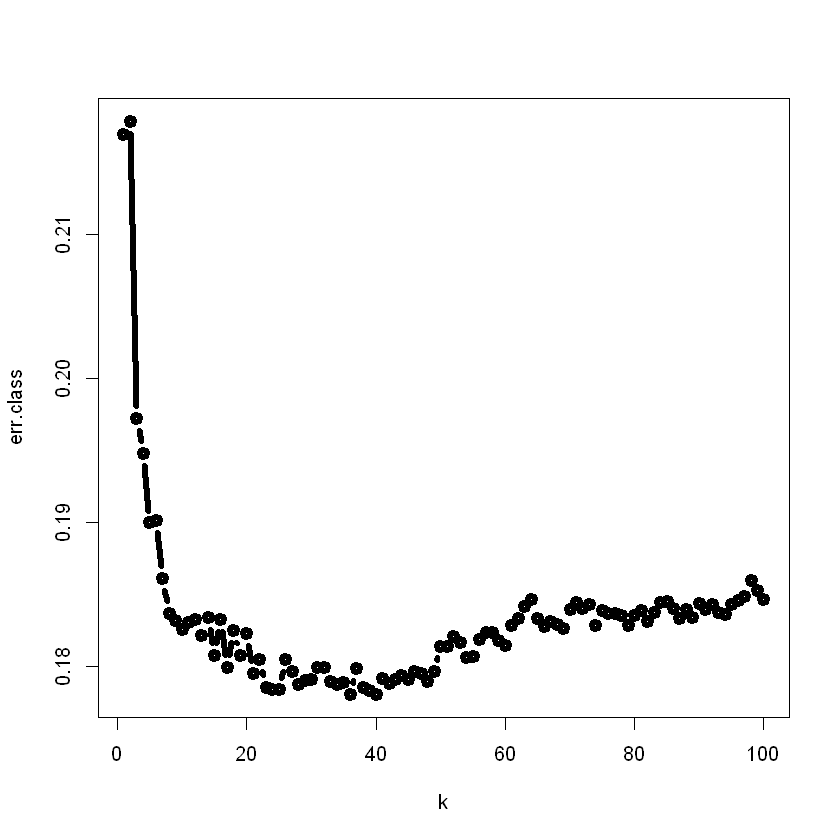

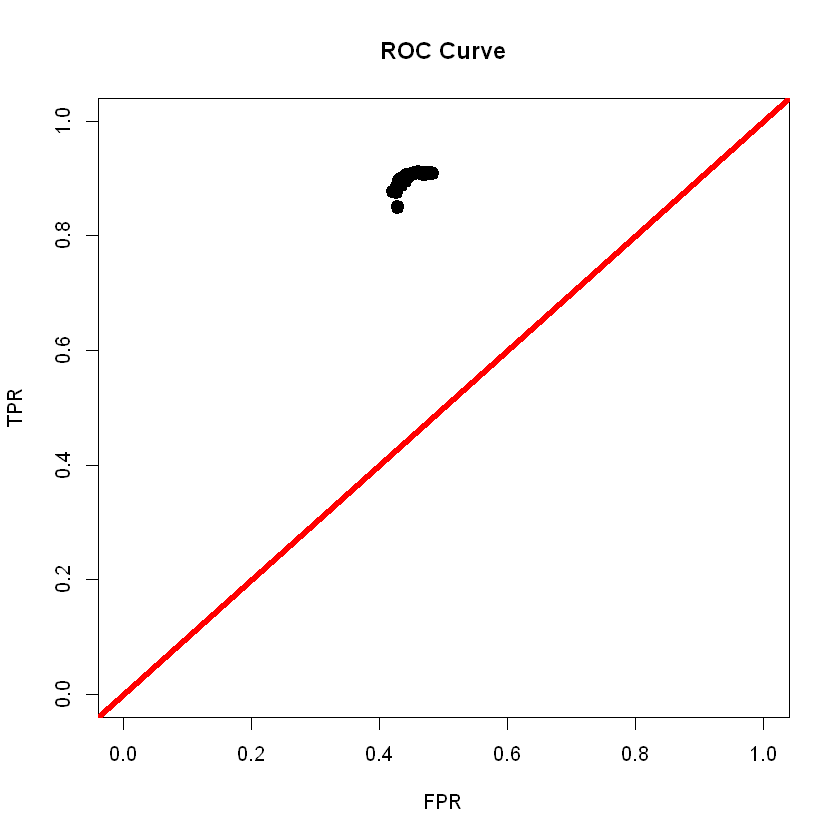

In [14]:
# choose K

err.class = rep(0,100) # calculate error for each K

TPR = rep(0,100)
FPR = rep(0,100)

for (k in 1:100){
  yhat = knn(scale(xtrain), scale(xtest), ytrain, k)
  err.class[k] = mean(yhat != ytest)
  FPR[k] = sum(yhat==1 & ytest==0)/ sum(ytest==0) # false positive
  TPR[k] = sum(yhat==1 & ytest==1)/ sum(ytest==1) # true positive
}

k= 1:100
plot(k, err.class, type="b", lwd=5)
which.min(err.class) # K= 36

plot(FPR, TPR, lwd= 5, main= "ROC Curve", type= "b", xlim=c(0,1), ylim=c(0,1))
abline(0,1, col="red", lwd=5)

In [15]:
err.class[36]

[1] 0.1780386

## Classification Tree

- At first fitting, our testing error rate is 18.1%.

In [16]:
library(tree)
adult_tree <- adult[,-5] # keep same variables as before models.

Registered S3 method overwritten by 'tree':
  method     from
  print.tree cli 



In [17]:
n = nrow(adult_tree)
z = sample(n, n*0.8)

fit.tree <- tree(as.factor(income)~  relationship + eduaction + capital_gain + 
                      occupation + capital_loss + hours_per_week + age + sex + 
                      marital_status + workclass + fnlwgt + race, adult_tree, subset= z)

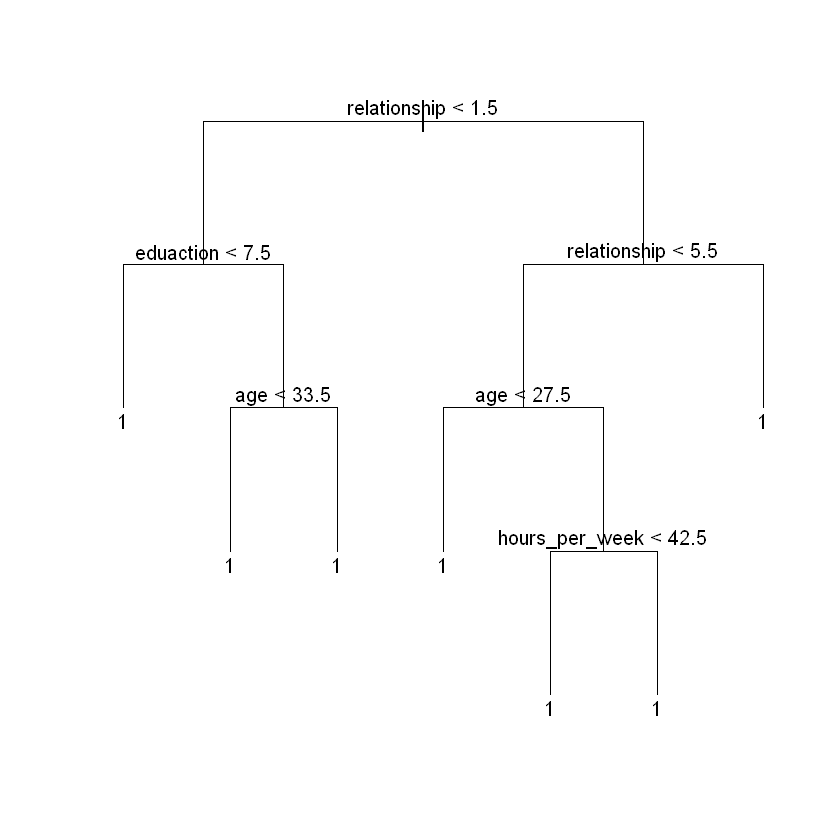

In [55]:
plot(fit.tree, type="uniform")      
text(fit.tree)

In [18]:
summary(fit.tree)


Classification tree:
tree(formula = as.factor(income) ~ relationship + eduaction + 
    capital_gain + occupation + capital_loss + hours_per_week + 
    age + sex + marital_status + workclass + fnlwgt + race, data = adult_tree, 
    subset = z)
Variables actually used in tree construction:
[1] "relationship" "capital_gain" "eduaction"    "capital_loss" "age"         
Number of terminal nodes:  8 
Residual mean deviance:  0.7407 = 17870 / 24120 
Misclassification error rate: 0.1891 = 4562 / 24129 

In [19]:
preds = predict(fit.tree, newdata= adult_tree[-z,], type="class")
table(preds, adult_tree[-z,]$income)

     
preds    0    1
    0  406   18
    1 1074 4535

In [21]:
mean(preds!= adult_tree[-z,]$income)

[1] 0.1810045

- <b>Pruning</b>
- After pruning, we still have same result. 18.1%

In [22]:
cv= cv.tree(fit.tree)
cv

$size
[1] 8 7 6 5 4 3 2 1

$dev
[1] 17870.96 18666.02 18688.98 19207.80 21700.36 21700.36 23149.64 27130.38

$k
[1]      -Inf  393.7081  417.2221  519.8932 1238.5389 1258.5172 1449.8556
[8] 3983.1451

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

In [23]:
which.min(cv$dev)

[1] 1

In [24]:
cv$dev[1]
cv$size[1]

[1] 17870.96

[1] 8


Classification tree:
tree(formula = as.factor(income) ~ relationship + eduaction + 
    capital_gain + occupation + capital_loss + hours_per_week + 
    age + sex + marital_status + workclass + fnlwgt + race, data = adult_tree, 
    subset = z)
Variables actually used in tree construction:
[1] "relationship" "capital_gain" "eduaction"    "capital_loss" "age"         
Number of terminal nodes:  8 
Residual mean deviance:  0.7407 = 17870 / 24120 
Misclassification error rate: 0.1891 = 4562 / 24129 

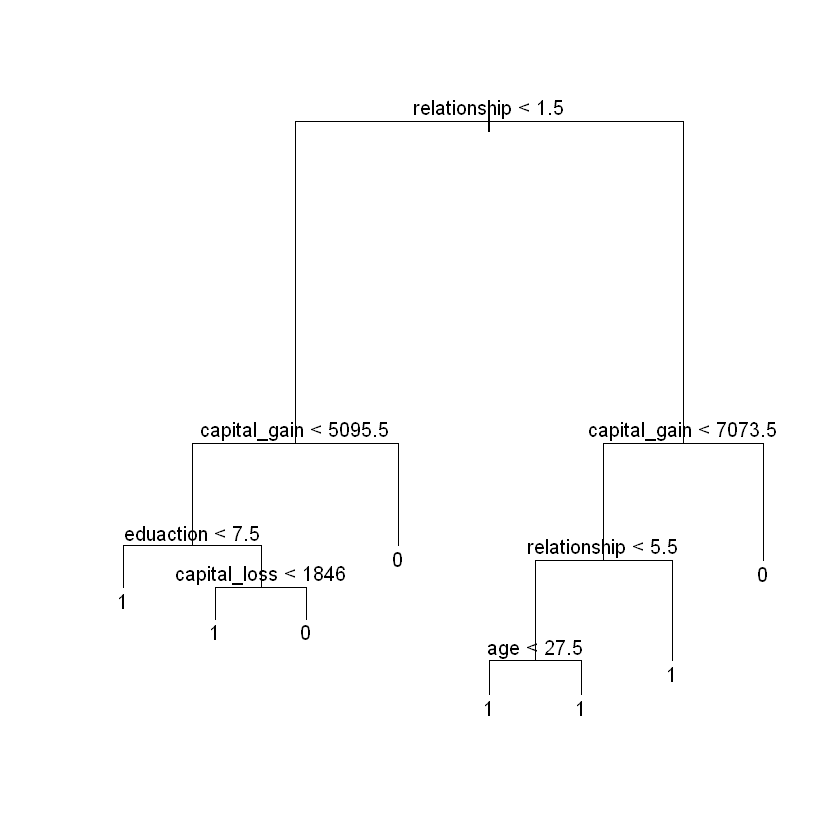

In [25]:
tr.opt = prune.tree(fit.tree, best= 8)
plot(tr.opt)
text(tr.opt)
summary(tr.opt)

In [26]:
preds = predict(tr.opt, newdata= adult_tree[-z,], type="class")
table(preds, adult_tree[-z,]$income)

     
preds    0    1
    0  406   18
    1 1074 4535

In [27]:
mean(preds!= adult_tree[-z,]$income)

[1] 0.1810045

# Random Forest

- At first, our model's testing error rate is 14.55%


In [4]:
adult<-read.table("adult.data", sep=",", stringsAsFactors = F, na.strings = "?")
colnames(adult)<-c("age","workclass","fnlwgt","eduaction","education_num","marital_status","occupation",
                   "relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income")
head(adult)

,age,workclass,fnlwgt,eduaction,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
z = c()
for (i in 1:nrow(adult)){
  for (j in 1:15){
    if(adult[i,j]==" ?"){
      z = append(z,i)
      break
    }
  }
}

adult = adult[-z, ]

mutate(adult, income = recode(income," <=50K"="1",
                              " >50K"="0")) -> adult # because logistic regression predict 1/0, we transfer here.

adult$income <- as.numeric(adult$income)
head(adult)

,age,workclass,fnlwgt,eduaction,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1


In [6]:
z=c()
for (i in 1:nrow(adult)){
  if(adult[i,11] > 5000 || adult[i,12] > 1000){
    z = append(z,i)
  }
}
adult = adult[-z, ]
adult

,age,workclass,fnlwgt,eduaction,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>
1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
6,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1
7,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,1
8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,0
11,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,0


In [7]:
n = nrow(adult)
z = sample(n, n*0.8)

In [8]:
library(randomForest)
train_RF = randomForest(as.factor(income)~., data= adult[z,])
train_RF

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:ggplot2':

    margin





Call:
 randomForest(formula = as.factor(income) ~ ., data = adult[z,      ]) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 3

        OOB estimate of  error rate: 14.67%
Confusion matrix:
     0     1 class.error
0 2112  2144  0.50375940
1 1049 16457  0.05992231

In [9]:
yhat = predict(train_RF, newdata= adult[-z,])

table(yhat, adult$income[-z])
mean(yhat!= adult[-z,]$income) 

    
yhat    0    1
   0  554  248
   1  544 4095

[1] 0.1455615

## Tuning

- Choose the best variables numbers to select in each split and how many trees should be built.
- 3 variables, 1444 trees are our best parameters.
- Error rate is 14.37%
- Use variable important plot to show age, fnlwgt, relationship, education number, and marital status are top 5 important variables.

In [10]:
p = ncol(adult) -1

ERRORRATE = rep(0,p) # p = 11 predictors. try every predictors to find the best random forest
optimaltrees = rep(0,p)

for(k in 1:p){
  train_RF = randomForest(as.factor(income)~., data= adult[z,], mtry= k)
  optimaltrees[k] = which.min(train_RF$err.rate) # In each variables selection, number with lowest error rate = optimal trees.
  
  train_RF = randomForest(as.factor(income)~., data= adult[z,], mtry= k, ntree= optimaltrees[k])
  yhat = predict(train_RF, newdata = adult[-z,])
  
  ERRORRATE[k] = mean(yhat!= adult$income[-z])
  #plot(train_RF$err.rate)
}

In [11]:
which.min(ERRORRATE)

[1] 3

In [12]:
optimaltrees[3]

[1] 1444

In [13]:
best_RF = randomForest(as.factor(income)~., data= adult[z,], mtry= 3, ntree= 1444) 
best_RF


Call:
 randomForest(formula = as.factor(income) ~ ., data = adult[z,      ], mtry = 3, ntree = 1444) 
               Type of random forest: classification
                     Number of trees: 1444
No. of variables tried at each split: 3

        OOB estimate of  error rate: 14.7%
Confusion matrix:
     0     1 class.error
0 2111  2145  0.50399436
1 1055 16451  0.06026505

In [14]:
yhat = predict(best_RF, newdata= adult[-z,], type="class")

table(yhat, adult$income[-z])
mean(yhat!= adult$income[-z])

    
yhat    0    1
   0  557  241
   1  541 4102

[1] 0.1437236

,MeanDecreaseGini
age,753.780333
workclass,230.656424
fnlwgt,696.298636
eduaction,231.669679
education_num,586.669676
marital_status,484.463102
occupation,382.530972
relationship,689.534740
race,84.831996
sex,96.059611


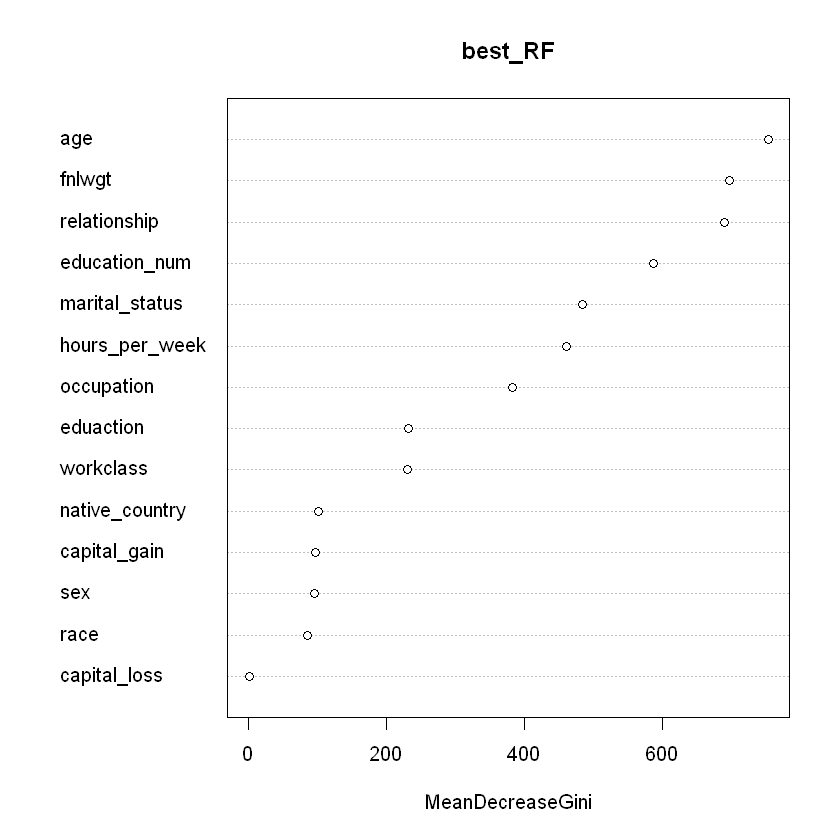

In [15]:
importance(best_RF) 
varImpPlot(best_RF)